In [1]:
import cv2 as cv
import dlib
from imutils import face_utils
import matplotlib.pyplot as plt
from scipy.spatial import distance
import numpy as np

%matplotlib inline

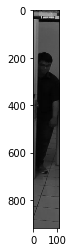

In [2]:
img = cv.imread('../person_data/1_0.png')

gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

# First Framework

1. Detection: Haar Cascade Classifier  
2. Landmark Extraction: DLib (Kazemi & Sullivan Method)  
3. Keyframe Extraction: Using thresholding on the size of the landmark

## Detect Faces

In [3]:
haar_classifier = cv.CascadeClassifier('model_data/haarcascade_frontalface_alt.xml')

In [4]:
def detect_faces(cascade_classifier, frame, scale_factor=1.1, min_neighbors=5):
    img = frame.copy()
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    faces = cascade_classifier.detectMultiScale(gray_img, scaleFactor=scale_factor, minNeighbors=min_neighbors)
    
    for (x, y, w, h) in faces:
        cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    return img, faces

In [5]:
img_with_face_bboxes, faces_position = detect_faces(haar_classifier, img)

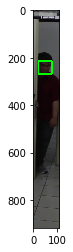

In [6]:
plt.imshow(cv.cvtColor(img_with_face_bboxes, cv.COLOR_BGR2RGB))

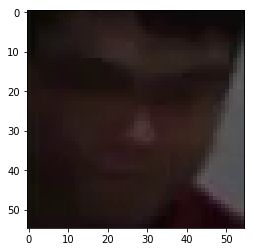

In [7]:
for x, y, w, h in faces_position:
    face_img = img[y:y+h, x:x+w]
    plt.imshow(cv.cvtColor(face_img, cv.COLOR_BGR2RGB))

In [8]:
faces_position

array([[ 22, 214,  55,  55]], dtype=int32)

## Facial Landmark Extraction

For the detail of landmark index for the face regions see following link:
https://www.pyimagesearch.com/2017/04/10/detect-eyes-nose-lips-jaw-dlib-opencv-python/

Caution!!! The image on that link is 1-based index, convert it to 0-based index by subtraction of 1

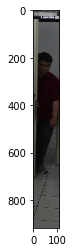

In [9]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [10]:
extractor = dlib.shape_predictor('model_data/shape_predictor_68_face_landmarks.dat')

In [11]:
def facial_landmark_extraction(extractor, frame, face_bboxes_position):
    '''
    @brief: The function extract all facial landmark from a frame
    Return: Dictionary of all facial landmark from a frame with key=face_index
    '''
    gray_img = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    facial_landmark_list = dict()
    for i, (x, y, w, h) in enumerate(face_bboxes_position):
        rect = dlib.rectangle(x, y, x+w, y+h)
        
        shape = extractor(frame, rect)
        shape = face_utils.shape_to_np(shape)
        
        facial_landmark_list[i] = shape
        
    return facial_landmark_list

In [12]:
facials_landmarks_dict = facial_landmark_extraction(extractor, img, faces_position)

In [13]:
FACIAL_LANDMARKS_IDXS = dict({
    'jaw': (0, 16),
    'right_eyebrow': (17, 21),
    'left_eyebrow': (22, 26),
    'nose': (27, 35),
    'right_eye': (36, 41),
    'left_eye': (42, 47),
    'mouth': (48, 68)
})

In [14]:
img_with_landmark = img_with_face_bboxes.copy()
for face_idx in facials_landmarks_dict:
    for i, (x, y) in enumerate(facials_landmarks_dict[face_idx]):
#         if i >= FACIAL_LANDMARKS_IDXS['nose'][0] and i <= FACIAL_LANDMARKS_IDXS['nose'][1]:
        cv.circle(img_with_landmark, (x,y), 1, (0, 255, 0), -1)

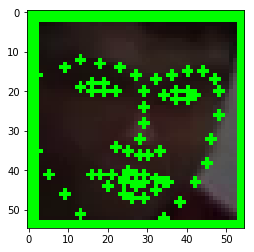

In [15]:
for x, y, w, h in faces_position:
    cropped_img = img_with_landmark[y:y+h, x:x+w]
    plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB))

## Keyframe Extraction

In [16]:
FACIAL_LANDMARKS_CORNERS_IDXS = {
    'jaw': (0, 16),
    'right_eyebrow': (17, 21),
    'left_eyebrow': (22, 26),
    'nose': (27, 33), # From Top to Bot
    'right_eye': (36, 39), 
    'left_eye': (42, 45),
    'mouth': (48, 54)
}

In [17]:
def landmark_size_extraction(facial_landmarks_dict):
    for face_idx in facials_landmarks_dict:
        landmark = facials_landmarks_dict[face_idx] 
        
        jaw_idx_corner1, jaw_idx_corner2 = FACIAL_LANDMARKS_CORNERS_IDXS['jaw']
        jaw_size = distance.euclidean(landmark[jaw_idx_corner1], landmark[jaw_idx_corner2])
        print(jaw_size)
        
        right_eyebrow_idx_corner1, right_eyebrow_idx_corner2 = FACIAL_LANDMARKS_CORNERS_IDXS['right_eyebrow']
        right_eyebrow_size = distance.euclidean(landmark[right_eyebrow_idx_corner1], landmark[right_eyebrow_idx_corner2])
        print(right_eyebrow_size)
        
        left_eyebrow_idx_corner1, left_eyebrow_idx_corner2 = FACIAL_LANDMARKS_CORNERS_IDXS['left_eyebrow']
        left_eyebrow_size = distance.euclidean(landmark[left_eyebrow_idx_corner1], landmark[left_eyebrow_idx_corner2])
        print(left_eyebrow_size)
        
        nose_idx_corner1, nose_idx_corner2 = FACIAL_LANDMARKS_CORNERS_IDXS['nose']
        nose_size = distance.euclidean(landmark[nose_idx_corner1], landmark[nose_idx_corner2])
        print(nose_size)
        
        right_eye_idx_corner1, right_eye_idx_corner2 = FACIAL_LANDMARKS_CORNERS_IDXS['right_eye']
        right_eye_size = distance.euclidean(landmark[right_eye_idx_corner1], landmark[right_eye_idx_corner2])
        print(right_eye_size)
        
        left_eye_idx_corner1, left_eye_idx_corner2 = FACIAL_LANDMARKS_CORNERS_IDXS['left_eye']
        left_eye_size = distance.euclidean(landmark[left_eye_idx_corner1], landmark[left_eye_idx_corner2])
        print(left_eye_size)
        
        mouth_idx_corner1, mouth_idx_corner2 = FACIAL_LANDMARKS_CORNERS_IDXS['mouth']
        mouth_size = distance.euclidean(landmark[mouth_idx_corner1], landmark[mouth_idx_corner2])
        print(mouth_size)
        
        return (jaw_size, right_eyebrow_size, left_eyebrow_size, nose_size, right_eye_size, left_eye_size, mouth_size)

In [18]:
landmark_size_extraction(facials_landmarks_dict)

46.17358552246078
18.110770276274835
15.0
16.0312195418814
9.055385138137417
8.0
19.1049731745428


(46.17358552246078,
 18.110770276274835,
 15.0,
 16.0312195418814,
 9.055385138137417,
 8.0,
 19.1049731745428)

# Face Dataset Creation

In [19]:
import os

In [20]:
haar_classifier = cv.CascadeClassifier('model_data/haarcascade_frontalface_alt.xml')
extractor = dlib.shape_predictor('model_data/shape_predictor_68_face_landmarks.dat')

In [21]:
person_img_dir_path = '../person_data'
person_img_path_list = os.listdir(person_img_dir_path)
person_img_path_list = sorted([os.path.join(person_img_dir_path, img_path) for img_path in person_img_path_list])

In [22]:
face_img_dir_path = '../face_data'

In [23]:
def create_face_dataset(person_id, person_img_path_list):
    counter = 0
    for idx, img_path in enumerate(person_img_path_list):
        if ('/' + str(person_id) + '_' in img_path):
            filename = img_path
            print(filename)
            person_img = cv.imread(filename)
            img_with_face_bboxes, faces_position = detect_faces(haar_classifier, person_img)
            
            if len(faces_position) != 0:
                
                x, y, w, h = faces_position[0]
                cropped_face_img = person_img[y:y+h, x:x+w]
                cv.imwrite(os.path.join('../face_data', str(person_id) + '_' + str(counter) + '.png'), cropped_face_img)
                print(counter)
                counter += 1

In [24]:
create_face_dataset(17, person_img_path_list)

../person_data/17_0.png
../person_data/17_1.png
../person_data/17_10.png
0
../person_data/17_11.png
1
../person_data/17_12.png
2
../person_data/17_13.png
3
../person_data/17_14.png
4
../person_data/17_15.png
5
../person_data/17_16.png
6
../person_data/17_17.png
7
../person_data/17_18.png
8
../person_data/17_19.png
9
../person_data/17_2.png
10
../person_data/17_20.png
11
../person_data/17_21.png
12
../person_data/17_22.png
13
../person_data/17_23.png
14
../person_data/17_24.png
15
../person_data/17_25.png
16
../person_data/17_26.png
17
../person_data/17_27.png
18
../person_data/17_28.png
19
../person_data/17_29.png
20
../person_data/17_3.png
21
../person_data/17_30.png
22
../person_data/17_31.png
23
../person_data/17_32.png
24
../person_data/17_33.png
25
../person_data/17_34.png
26
../person_data/17_35.png
27
../person_data/17_36.png
28
../person_data/17_37.png
29
../person_data/17_38.png
30
../person_data/17_39.png
31
../person_data/17_4.png
32
../person_data/17_40.png
33
../person_dat